# Figure 2a. Statistical power and False Discovery Rate (FDR) comparisons.

Statistical power and False Discovery Rate (FDR) comparisons of ColocBoost against COLOC (V5), MOLOC and HyPrColoc, in simulation settings involving 2, 5, 10, and 20 traits, up to five causal variants per trait per locus, with genotype data and induced colocalization configurations designed to mimic real world xQTL datasets. Details of power and FDR calculations are provided in Methods. The X-axis represents the maximum number of causal variants across traits.

In [2]:
library(tidyverse)
library(ggpattern)
library(ggpubr)
library(cowplot)
sumstat <- readRDS("data/Figure_2a.rds")
sumstat <- sumstat %>% filter(max_causal != 4)
colors_man <- c("#B24745FF", "#00A1D5FF", "#79AF97FF", "#DF8F44FF")

## Statistical power

In [3]:
p1 <- sumstat %>% 
  ggplot(aes(x = as.character(max_causal), y = power, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  ylim(0, 1.05) + 
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ marginal_trait_number,
             labeller = labeller(marginal_trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  geom_errorbar(aes(ymin = power - 1.96*power_SD/ sqrt(20) , 
                    ymax = power + 1.96*power_SD/ sqrt(20) ),
                width = .2, position = position_dodge(width = 0.7)) +
  scale_fill_manual(values = colors_man, name = "Methods") +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Max Number of True Causal Variants Per Trait", y = "Power", color = "Methods") +
  theme(legend.position = "none",
        axis.title.x = element_text(size = 24), 
        axis.title.y = element_text(size = 30),
        axis.text.x = element_text(size = 22), 
        axis.text.y = element_text(size = 22),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 24, margin = margin(l = 5, r= 8)),
        text=element_text(size=24,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          #     axis.line = element_line(color = "black") # Keep the axis lines
        )

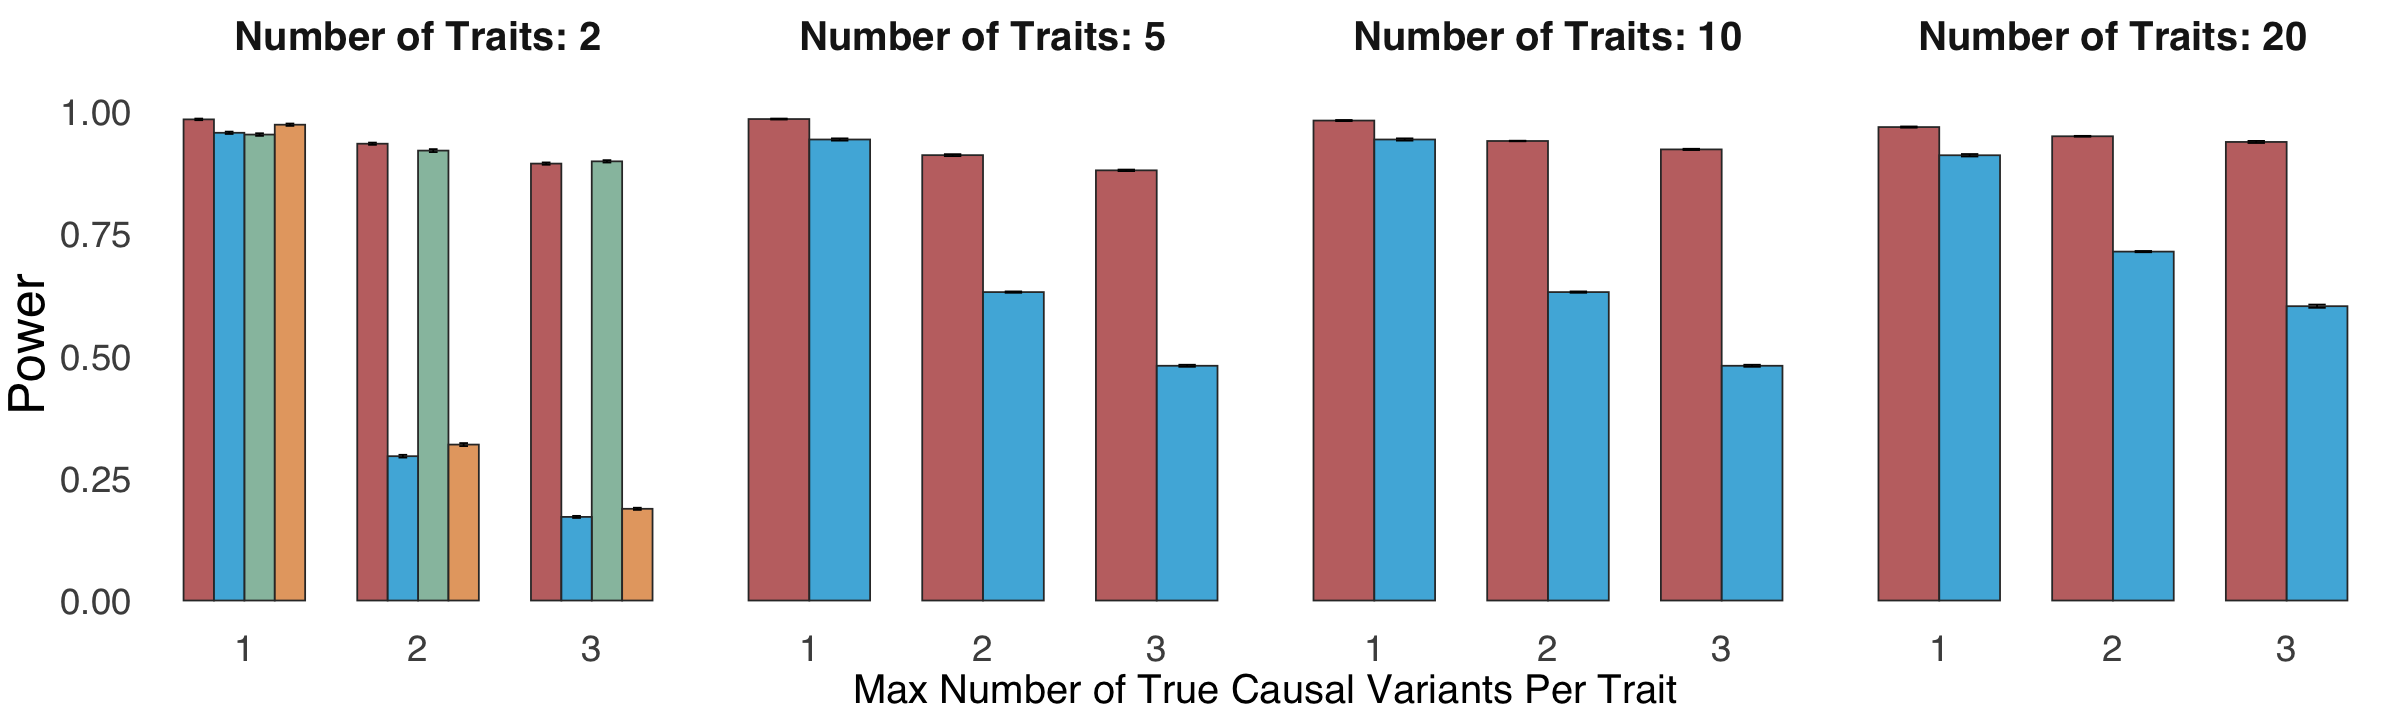

In [4]:
options(repr.plot.width = 20, repr.plot.height = 6)
p1

## FDR

In [5]:
p2 <- sumstat %>% 
  ggplot(aes(x = as.character(max_causal), y = FDR, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  ylim(0, 0.2) +
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ marginal_trait_number,
             labeller = labeller(marginal_trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  geom_errorbar(aes(ymin = FDR - 1.96 * FDR_SD / sqrt(20), 
                    ymax = FDR + 1.96 *FDR_SD / sqrt(20)),
                width = .2, position = position_dodge(width = 0.7)) +
  scale_fill_manual(values = colors_man, name = "Methods") +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Max Number of True Causal Variants Per Trait", y = "FDR", color = "Methods") +
  geom_hline(yintercept = 0.05, linetype = "dashed", color = "red", linewidth = 0.6) +
  # geom_hline(yintercept = 0.1, linetype = "dashed", color = "blue", linewidth = 0.6) +
  theme(legend.position = "bottom",
        axis.title.x = element_text(size = 24), 
        axis.title.y = element_text(size = 30),
        axis.text.x = element_text(size = 22), 
        axis.text.y = element_text(size = 22),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 24, margin = margin(l = 5, r= 8)),
        text=element_text(size=24,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

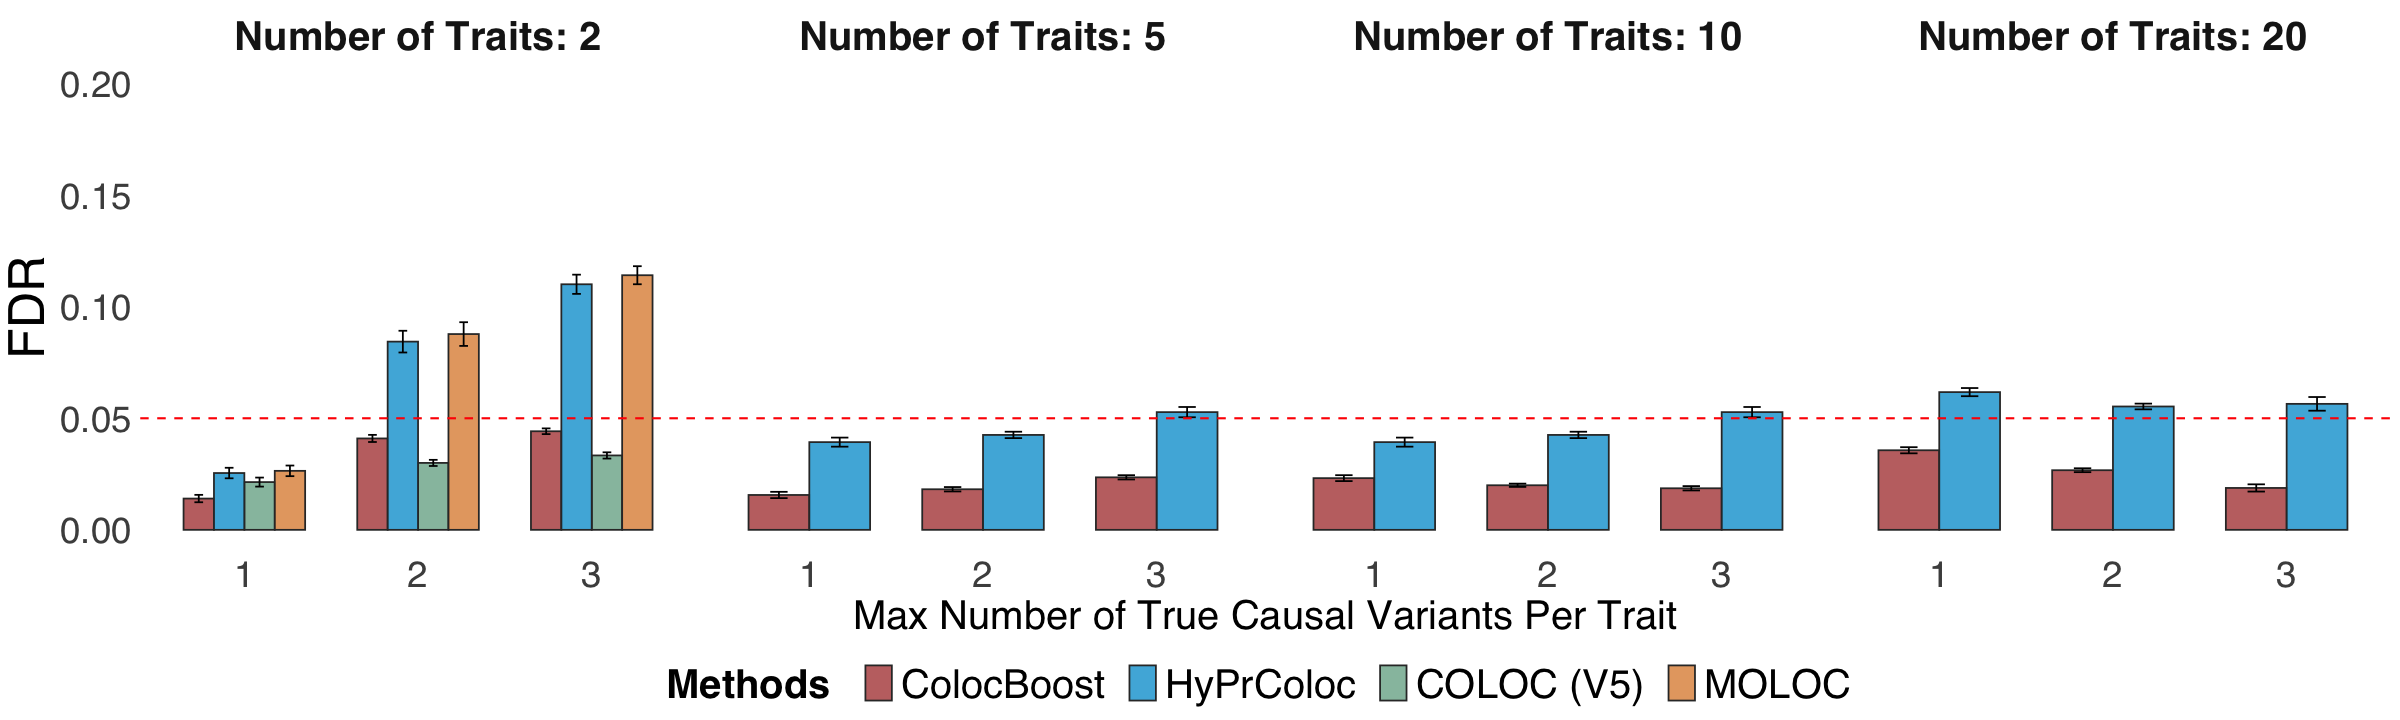

In [6]:
options(repr.plot.width = 20, repr.plot.height = 6)
p2